In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

References:
https://towardsdatascience.com/multi-armed-bandits-and-reinforcement-learning-dc9001dcb8da

To Do:
- Multi Arm Bandit with options for stationarity and different action-value methods 
- Implement non-stationarity (i.e., Random Walk)
- Implement Evaluation Function.



In [2]:
class multiarm_bandit:

    def __init__(self, k, epsilon, mu,  iterations, action_value_method = "weighted", alpha = None):
        self.k = k
        self.alpha = alpha
        self.epsilon = epsilon
        self.iters = iterations
        self.n = 0 # initial step count
        self.action_n = np.zeros(k) # initial count for executing each of k actions/pulling arms

        # realized rewards
        self.mean_reward = 0 # storer for rewar
        self.reward = np.zeros(iterations) # array for storing realized reward values

        # reward estimates for each arm/action
        self.q = np.zeros(k)

        self.value_method = action_value_method


        # Expected values (mu)
        # if mu shall be gaussian rv, sampling mu from N(0,1)
        if mu == "random":
            self.mu = np.random.normal(0,1,k)
        
        #if mu is inputted as list, converting to np.array
        if isinstance(mu, list):
            self.mu = np.array(mu)

    def trigger(self):
        # generating a rv from binomial distribution with
        # P(rv = 1) = epsilon
        # rv=1 -> non-greedy execution
        # rv=0 -> greedy execution
        rv = np.random.binomial(1, self.epsilon, 1)


        # ACTION SELECTION
        # first iteration
        if self.n == 0:
            # randomly selects integer from array[0,...,k-1] with unit probability
            a = np.random.choice(self.k)
        
        # choosing greedy action if rv = 0
        elif rv == 0:
            a = np.argmax(self.q)

        # choosing non-greedy action of rv = 1
        elif rv == 1:
            a = np.random.choice(self.k)

        # sampling actual reward from respective gaussian -> N(mu_a, 1)
        reward = np.random.normal(self.mu[a], 1)

        # updating counts
        self.n += 1
        self.action_n[a] += 1

        # calculating and updating mean reward
        self.mean_reward = self.mean_reward + (1/self.n) * (reward - self.mean_reward)

        # ACTION SELECTION VALUE UPDATE
        # sample-average method (for stationary case)
        if self.value_method == "average":
            self.q[a] = self.q[a] + (1/self.action_n[a]) * (reward - self.q[a])

        if self.value_method == "weighted":
            self.q[a] = self.q[a] + self.alpha * (reward - self.q[a])
            




    def execute(self):
        # executing bandit for given iterations

        
        for i in range(self.iters):
            self.trigger()
            self.reward[i] = self.mean_reward # output reward is the mean reward achieved over time

        out = {
            "rewards":self.reward,
            "q-estimates":self.q
        }

        return(out)

    def stats(self):

        stats = {
            "action_counts":self.action_n,
            "epsilon": self.epsilon,
            "mu_values":self.mu,
            "action_value_method":self.value_method,
        }

        return stats
        
    def reset(self):
        self.n = 0
        self.action_n = np.zeros(self.k)
        self.mean_reward = 0 # storer for rewar
        self.reward = np.zero(self.iters) # array for storing realized reward values
        self.q = np.zeros(self.k)


In [3]:
# defining bandit
bandit = multiarm_bandit(k=5, epsilon=0, mu = "random", iterations= 1000)

In [4]:
def analytics_wrapper(model, plot_out=True):
    import matplotlib.pyplot as plt
    import numpy as np

    results = model.execute()
    rewards = results["rewards"]


    plt.plot(rewards, linestyle = 'dotted')
    plt.show()

    

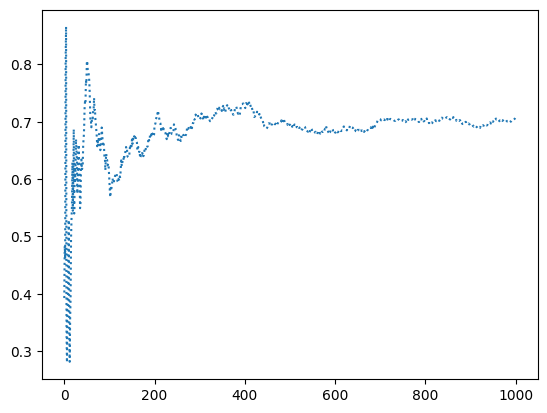

In [5]:
analytics_wrapper(model = bandit)

In [6]:
bandit.reset()
bandit.stats()

AttributeError: module 'numpy' has no attribute 'zero'